In [ ]:
import numpy as np
import matplotlib
matplotlib.use('tkagg')
import matplotlib.pyplot as plt
import random

In [2]:
%%time
G1 = [0]
G2 = [0]
G3 = [0]
t = [0]

tend = 1000

k_1 = 2
gamma_1 = 0.1
k_2 = 2
gamma_2 = 0.1
k_3 = 2
gamma_3 = 0.1
n = 9
c = 1

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 8.82 µs


In [4]:
%%time
while t[-1] < tend:

        current_G1 = G1[-1]
        current_G2 = G2[-1]
        current_G3 = G3[-1]

        rates = [(c**n / (c**n + current_G3**n)) * k_1, gamma_1 * current_G1, \
        (current_G1**n / (c**n + current_G1**n)) * k_2, gamma_2 * current_G2, \
        (current_G2**n / (c**n + current_G2**n)) * k_3, gamma_3 * current_G3]

        rate_sum = sum(rates)

        tau = np.random.exponential(scale=1/rate_sum)

        t.append(t[-1] + tau)

        rand = random.uniform(0,1)


        # G1 production event
        if rand * rate_sum <= rates[0]:
                G1.append(G1[-1] + 1)
                G2.append(G2[-1])
                G3.append(G3[-1])

        # G1 decay event
        elif rand * rate_sum > rates[0] and rand * rate_sum <= sum(rates[:2]):
                G1.append(G1[-1] - 1)
                G2.append(G2[-1])
                G3.append(G3[-1])

        # G2 production event
        elif rand * rate_sum > sum(rates[:2]) and rand * rate_sum <= sum(rates[:3]):

                G1.append(G1[-1])
                G2.append(G2[-1] + 1)
                G3.append(G3[-1])

        # G2 decay event
        elif rand * rate_sum > sum(rates[:3]) and rand * rate_sum <= sum(rates[:4]):

                G1.append(G1[-1])
                G2.append(G2[-1] - 1)
                G3.append(G3[-1])

        # G3 production event
        elif rand * rate_sum > sum(rates[:4]) and rand * rate_sum <= sum(rates[:5]):

                G1.append(G1[-1])
                G2.append(G2[-1])
                G3.append(G3[-1] + 1)

        # G3 decay event
        elif rand * rate_sum > sum(rates[:5]) and rand * rate_sum <= sum(rates[:6]):
                G1.append(G1[-1])
                G2.append(G2[-1])
                G3.append(G3[-1] - 1)

CPU times: user 50.2 ms, sys: 1.94 ms, total: 52.2 ms
Wall time: 50.7 ms


In [ ]:
%%time
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
line1, = ax1.plot(t , G1, color="b",label="G1")
line2, = ax2.plot(t , G2, color="r",label="G2")
line3, = ax3.plot(t , G3, color="g",label="G3")
ax1.set_ylabel('Number')
ax1.set_xlabel('Time')
ax1.legend(handles=[line1,line2,line3])
plt.show()

In [1]:
import numpy as np 
# numpy.random.normal() method
random_array = np.random.normal(0.0, 1.0, 5)
  
# printing 1D array with random numbers
print("1D Array with random values : \n", random_array)

1D Array with random values : 
 [ 1.12211553 -0.45770113 -0.1406273   1.44632305 -0.52522951]


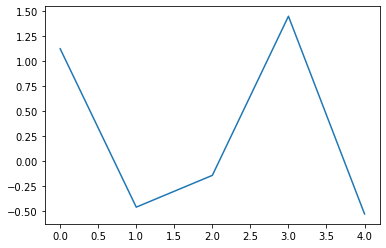

In [4]:
import matplotlib.pyplot as plt
plt.plot(random_array)
plt.show()